

![](https://media.datacenterdynamics.com/media/images/coronavirus_8W0fob1.original.png)

#### As the coronavirus outbreak continues to spread in the country,the question that we as Indians are trying to answer is : whether India will be able to tackle its menance or are we going to witness another Italy or S.Korea?

In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Part 1: Analysing the present condition in India

The first **COVID-19** case was reported on on 30 January in a student who arrived in **Kerala** state from Wuhan.Then 2 more cases were reported in the enxt 2 days in Kerala again. For almost a month, no new cases was reported in India, however, on 8th March, five new cases of corona virus in Kerala were again reported and since then the cases have been rising affecting **14** states, till now.Here is a brief timeline of the first 100 cases in India

![](https://imgur.com/6wtDrrQ.png)

In [23]:
# Reading the datasets

df= pd.read_csv("Covid cases in India.csv")
df_india = df.copy()

# Coordinates of India States and Uts
India_coord = pd.read_csv('Indian Coordinates.csv')

#Day by day data of India, Korea and Italy
dbd_India = pd.read_excel("per_day_cases.xlsx",sheet_name='India')
dbd_Italy = pd.read_excel('per_day_cases.xlsx',sheet_name="Italy")
dbd_Korea = pd.read_excel('per_day_cases.xlsx',sheet_name="Korea")


In [24]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,1583,1062,488,33
1,2,Andaman and Nicobar Islands,33,1,32,0
2,3,Arunachal Pradesh,1,0,1,0
3,4,Assam,43,9,33,1
4,5,Bihar,517,396,117,4


In [25]:
India_coord.head()

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [26]:
dbd_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S. No.                     32 non-null     int64 
 1   Name of State / UT         32 non-null     object
 2   Total Confirmed cases      32 non-null     int64 
 3   Active                     32 non-null     int64 
 4   Cured/Discharged/Migrated  32 non-null     int64 
 5   Deaths                     32 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.4+ KB


In [28]:
df.describe()

,S. No.,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,16.500000,1329.562500,918.000000,367.968750,43.468750
std,9.380832,2551.962419,1975.249433,539.191419,108.627206
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,8.750000,38.250000,8.250000,18.500000,0.000000
50%,16.500000,302.000000,98.000000,88.500000,3.500000
75%,24.250000,1222.250000,988.500000,502.250000,30.750000
max,32.000000,12974.000000,10311.000000,2115.000000,548.000000


In [29]:
df.shape

(32, 6)

In [36]:
df[df['Total Confirmed cases'] == df['Total Confirmed cases'].max()]

,S. No.,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
18,19,Maharashtra,12974,10311,2115,548


In [37]:
df[df['Total Confirmed cases'] == df['Total Confirmed cases'].min()]

,S. No.,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
2,3,Arunachal Pradesh,1,0,1,0
21,22,Mizoram,1,1,0,0


In [49]:
df[df['Total Confirmed cases'] == df['Total Confirmed cases'].max()]

,S. No.,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
18,19,Maharashtra,12974,10311,2115,548


In [39]:
df[df['Deaths'] == df['Deaths'].min()]

,S. No.,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
1,2,Andaman and Nicobar Islands,33,1,32,0
2,3,Arunachal Pradesh,1,0,1,0
6,7,Chhattisgarh,57,21,36,0
8,9,Goa,7,0,7,0
16,17,Ladakh,42,25,17,0
19,20,Manipur,2,0,2,0
21,22,Mizoram,1,1,0,0
23,24,Pondicherry,12,6,6,0
28,29,Tripura,16,14,2,0


In [50]:
#df.drop(['S. No.'],axis=1,inplace=True)

print(f'Total number of Confirmed COVID 2019 cases across India:', df['Total Confirmed cases'].sum())
print(f'Total number of Active COVID 2019 cases across India:', df['Active'].sum())
print(f'Total number of Cured/Discharged/Migrated COVID 2019 cases across India:', df['Cured/Discharged/Migrated'].sum())
print(f'Total number of Deaths due to COVID 2019  across India:', df['Deaths'].sum())
print(f'Total number of States/UTs affected:', len(df['Name of State / UT']))

Total number of Confirmed COVID 2019 cases across India: 42546
Total number of Active COVID 2019 cases across India: 29376
Total number of Cured/Discharged/Migrated COVID 2019 cases across India: 11775
Total number of Deaths due to COVID 2019  across India: 1391
Total number of States/UTs affected: 32


## 1.1 Distribution of Cases in India

In [51]:
#importing pycountry to plot maps
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [8]:
from pywaffle import Waffle

py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## 1.2 State/Union Territories wise number of Covid-19 cases

In [54]:
x = df.groupby('Name of State / UT')['Active'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,Active
Name of State / UT,
Maharashtra,10311
Gujarat,4096
Delhi,3123
Madhya Pradesh,1883
Uttar Pradesh,1848
Tamil Nadu,1614
Rajasthan,1459
Andhra Pradesh,1062
Punjab,964


In [55]:
fig = px.bar(df.sort_values('Active', ascending=False).sort_values('Active', ascending=True), 
             x="Active", y="Name of State / UT", 
             title='Total Active Cases', 
             text='Active', 
             orientation='h', 
             width=1000, height=700, range_x = [0, max(df['Active'])])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

## 1.3 Visualising the spread geographically

In [57]:
# create map and display it

df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 80], zoom_start=1,tiles='Stamen Toner')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Active'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon],
                        radius=value*0.002,
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Active Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.3 ).add_to(map)
map

In [58]:
%%HTML
<div class='tableauPlaceholder' id='viz1588697469217' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;44&#47;44JW7JNG3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;44JW7JNG3' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;44&#47;44JW7JNG3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1588697469217');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1477px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## 1.4 Confirmed vs Recovered figures

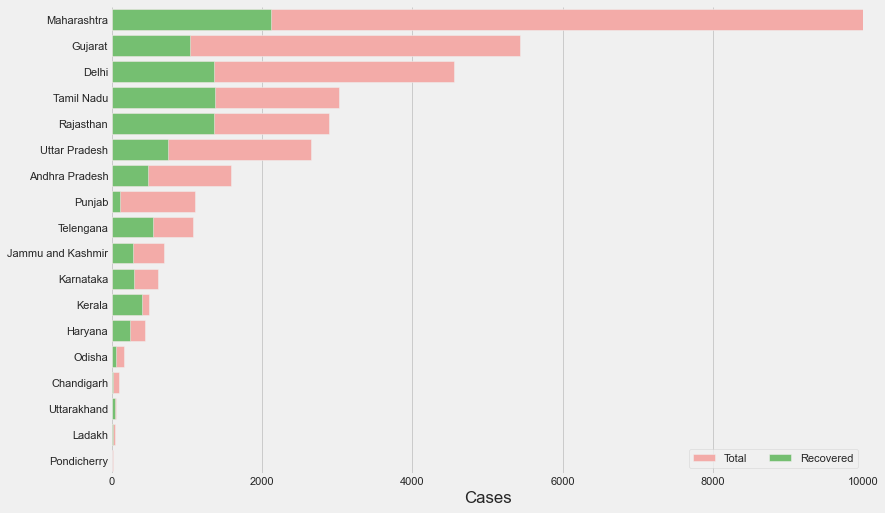

In [59]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated','Deaths']]
data.sort_values('Total Confirmed cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Confirmed cases", y="Name of State / UT", data=data,
            label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data,
            label="Recovered", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)

## 1.5 How the Coronavirus cases are rising?

In [67]:
# Rise in COVID-19 cases in India
fig = go.Figure()

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['New Cases'], mode='lines',name='New Cases'))    
fig.update_layout(title_text='Trend of Coronavirus Cases in India(Cumulative cases)',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='New Coronavirus Cases in India per day',plot_bgcolor='rgb(250, 242, 242)')
fig.show()

# Part B: Is the trend similar to Italy and S.Korea?

India has already crossed 100 cases. It is very important to contain the situation in the coming week.The numbers of coronavirus patients starting doubling after these countries hit the 100 mark and almost starting increasing exponentially. Incase you want to understand what is exponential growth and how cases see an abrupt increase , here is a great video by [**3Blue1Brown**](https://www.youtube.com/watch?v=Kas0tIxDvrg):


In [70]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Kas0tIxDvrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## 2.1 Cumulative cases in India, Italy and S.Korea

In [71]:
fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600, title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600, title='Confirmed Cases in Korea', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600, title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

## 2.2 Comparison between the rise of cases in S.Korea, Italy and India

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'], marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'], marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [64]:

from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),
              2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

## 2.3 Trend after surpassing 100 cases

In [73]:
import plotly.graph_objects as go
import numpy as np

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(0,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [8, 8, 12]
line_size = [2, 2, 4]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[1]),            
                 connectgaps=True,
    ))

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after surpassing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')
fig.show()

![](https://gramener.com/indiamap)
#JSMJSM